In [7]:
import numpy as np
def sigmoid(x):
    return 1 / (1+np.exp(-x))
class Perceptron:
    def __init__(self,isize,lr=0.1):
        self.weights = np.random.rand(isize)
        self.bias = np.random.rand()
        self.lr = lr 
    def predict(self,inputs):
        total = np.dot(inputs,self.weights)+self.bias
        return sigmoid(total)
    def train(self,X,y,epochs = 1000):
        for epo in range(epochs):
            for i,t in zip(X,y):
                p = self.predict(i)
                e = t - p
                self.weights += self.lr*e*i
                self.bias+=self.lr*e
Xand = np.array([[0,0],[0,1],[1,0],[1,1]])
yand = np.array([0,0,0,1])
per = Perceptron(isize=2)
per.train(Xand,yand)
for i in Xand:
    print(f"Input:{i},Predicted:{per.predict(i):.4f}")


Input:[0 0],Predicted:0.0002
Input:[0 1],Predicted:0.0484
Input:[1 0],Predicted:0.0487
Input:[1 1],Predicted:0.9333


Testing AND gate perceptron:
Input: [0 0], Predicted Output: 0.0000
Input: [0 1], Predicted Output: 0.0050
Input: [1 0], Predicted Output: 0.0051
Input: [1 1], Predicted Output: 0.9929


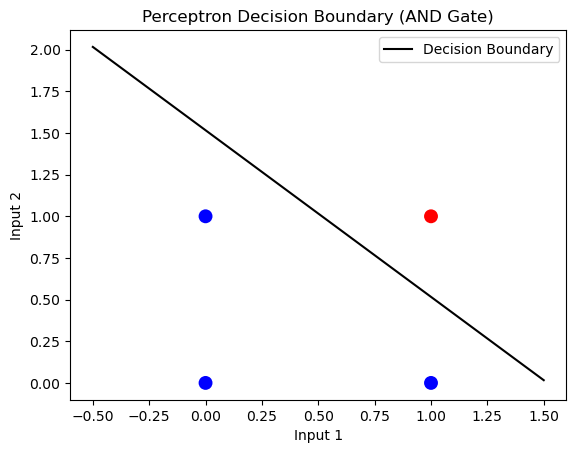

In [12]:



import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def train_perceptron(inputs, targets, epochs, learning_rate):
    weights = np.random.rand(inputs.shape[1])
    bias = np.random.rand()  
    for epoch in range(epochs):
        for input, target in zip(inputs, targets):
            weighted_sum = np.dot(input, weights) + bias
            output = sigmoid(weighted_sum)
            error = target - output
            weights += learning_rate * error * input  
            bias += learning_rate * error

    return weights, bias


def predict(input, weights, bias):
    weighted_sum = np.dot(input, weights) + bias
    return sigmoid(weighted_sum)

X_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_and = np.array([0, 0, 0, 1])
weights_and, bias_and = train_perceptron(X_and, y_and, epochs=10000, learning_rate=0.1)


print("Testing AND gate perceptron:")
for input in X_and:
    prediction = predict(input, weights_and, bias_and)
    print(f"Input: {input}, Predicted Output: {prediction:.4f}")


plt.scatter(X_and[:, 0], X_and[:, 1], c=y_and, cmap="bwr", marker="o", s=100, edgecolors="none")
x1_values = np.linspace(-0.5, 1.5, 100)
x2_values = -(weights_and[0] * x1_values + bias_and) / weights_and[1]
plt.plot(x1_values, x2_values, color="black", label="Decision Boundary")
plt.title("Perceptron Decision Boundary (AND Gate)")
plt.xlabel("Input 1")
plt.ylabel("Input 2")
plt.legend()

plt.show()



    

In [10]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

class MLP:
    def __init__(self, input_size, hidden_size, output_size, lr=0.1):
        self.w1 = np.random.rand(input_size, hidden_size)
        self.w2 = np.random.rand(hidden_size, output_size)
        self.b1 = np.random.rand(hidden_size)
        self.b2 = np.random.rand(output_size)
        self.lr = lr

    def forward(self, X):
        self.h = np.dot(X, self.w1) + self.b1
        self.o = sigmoid(self.h)
        self.y = np.dot(self.o, self.w2) + self.b2
        self.pred = sigmoid(self.y)
        return self.pred

    def backward(self, X, y):
        error = y - self.pred
        d_pred = error * sigmoid_derivative(self.pred)
        d_h = d_pred.dot(self.w2.T) * sigmoid_derivative(self.o)
        
        self.w2 += self.o.T.dot(d_pred) * self.lr
        self.b2 += np.sum(d_pred, axis=0) * self.lr
        
        self.w1 += X.T.dot(d_h) * self.lr
        self.b1 += np.sum(d_h, axis=0) * self.lr

    def train(self, X, y, epochs=10000):
        for _ in range(epochs):
            self.forward(X)
            self.backward(X, y)

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

mlp = MLP(input_size=2, hidden_size=2, output_size=1, lr=0.1)
mlp.train(X, y, epochs=10000)

for inputs in X:
    print(f"Input: {inputs}, Predicted: {mlp.forward(np.array([inputs]))[0][0]:.4f}")



Input: [0 0], Predicted: 0.0985
Input: [0 1], Predicted: 0.9024
Input: [1 0], Predicted: 0.9029
Input: [1 1], Predicted: 0.1095


In [13]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

class Perceptron:
    def __init__(self, input_size, lr=0.1):
        self.w = np.random.rand(input_size)
        self.b = np.random.rand()
        self.lr = lr

    def predict(self, x):
        return sigmoid(np.dot(x, self.w) + self.b)

    def train(self, X, y, epochs=1000):
        for _ in range(epochs):
            for x, target in zip(X, y):
                pred = self.predict(x)
                error = target - pred
                self.w += self.lr * error * x
                self.b += self.lr * error

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

perceptron = Perceptron(input_size=2)
perceptron.train(X, y, epochs=1000)

for x in X:
    print(f"Input: {x}, Predicted: {perceptron.predict(x):.4f}")


Input: [0 0], Predicted: 0.5128
Input: [0 1], Predicted: 0.5000
Input: [1 0], Predicted: 0.4872
Input: [1 1], Predicted: 0.4744
